# Transforms query ranking to TREC eval style

#### Query ranking format:
    query-id    ranking                   scores

For example:

    PLAIN_1     [MED-1, MED-2, MED-7]     [500, 300, 230]
    PLAIN_2     [MED-7, MED-3, MED-2]     [540, 220, 170]

#### TREC format:
    query-id  Q0  document-id  rank  score  STANDARD

For example:

    PLAIN_1   Q0  MED-1        1     500    RUN_1
    PLAIN_1   Q0  MED-2        2     300    RUN_1
    PLAIN_1   Q0  MED-3        3     230    RUN_1
    PLAIN_2   Q0  MED-7        1     540    RUN_1
    PLAIN_2   Q0  MED-3        2     220    RUN_1
    PLAIN_2   Q0  MED-2        3     170    RUN_1


## Import libraries

In [351]:
import pandas as pd
from tqdm import tqdm
from subprocess import check_output as run_program
import re


# Mount google drive to get data
(just for Marit)

In [352]:
# import os
# from google.colab import drive
# drive.mount('/content/gdrive');
# os.chdir('gdrive/My Drive/Information Retrieval/Information Retrieval Project/Notebooks')
# os.listdir()

## Make tranformation function

In [353]:
def TREC_evalify(query_ranking, top_n=100, run_name="RUN_1"):
    TREC_eval = []
    for query_id in tqdm(query_ranking.index.values):
        for i in range(top_n):
            doc   = query_ranking.ranking.loc[query_id][i]
            score = query_ranking.scores.loc[query_id][i]
            TREC_eval.append([query_id, "Q0", doc, i+1, score, run_name])
    # Return as pandas dataframe
    return pd.DataFrame(TREC_eval)

## Do the trick for BM25 ranking

In [354]:

# Specify the top n's
top_n = [10, 100]

# Specify run name
run_name = "RUN_1"

# Loop over data types
print(f"\n\tTREC evalify {dt} data")

# Loop over the top n's
for top in top_n:
    print(f"    TREC evalify BM25 for the top {top} results")

    # Specify data paths
    input_path = f'../Data/results/ranking.bm25.csv'
    output_path = f'../Data/results/trec.eval.top{top}.bm25.csv'

    # Load in data
    query_ranking         = pd.read_csv(input_path, sep=',', index_col=0, header=0 )
    query_ranking.ranking = query_ranking.ranking.apply(eval)
    query_ranking.scores  = query_ranking.scores.apply(eval)

    # TREC evalify
    TREC_eval = TREC_evalify(query_ranking, top, run_name)

    # Save TREC eval data (Tab seperated because qrel file from paper is tab seperated)
    TREC_eval.to_csv(output_path, sep='\t', index=None, header=None)


	TREC evalify train data
    TREC evalify BM25 for the top 10 results


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:00<00:00, 3511.39it/s]


    TREC evalify BM25 for the top 100 results


100%|█████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:08<00:00, 382.96it/s]


## Save trec ranking files

In [ ]:
# Specify the top n's
top_n = [10, 100]
# Specify the fairness constraint types
types   = ['spc', 'dic']
# Specify the epsilon values
epsilon = [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
    # Loop over the top n's
for top in top_n:
        print(f"\tTREC evalify reranking for the top {top} results")

        # Loop over fairness constraint types
        for t in types:
            print(f"   TREC evalify {t.upper()} fairness contraint rerankings")
            for i, e in enumerate(epsilon):
                print(f"TREC evalifying e={e}")

                ####################### Specify reranking data paths #######################
                input_path = f"../Data/results/{t}/reranking.top{top}.{t}.e{e}.train.csv"


                # Load in data
                query_ranking         = pd.read_csv(input_path, sep=',', index_col=0, header=0 )
                query_ranking.ranking = query_ranking.ranking.apply(eval)
                query_ranking.scores  = query_ranking.scores.apply(eval)

                # TREC evalify
                TREC_eval = TREC_evalify(query_ranking, top, run_name)

                # Save TREC eval data (Tab seperated because qrel file from paper is tab seperated)
                TREC_eval.to_csv(output_path, sep='\t', index=None, header=None)
                

	TREC evalify reranking for the top 10 results
   TREC evalify SPC fairness contraint rerankings
TREC evalifying e=0


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:00<00:00, 3572.54it/s]


TREC evalifying e=0.01


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:01<00:00, 3198.31it/s]


TREC evalifying e=0.1


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:00<00:00, 3602.72it/s]


TREC evalifying e=0.25


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:01<00:00, 3381.98it/s]


TREC evalifying e=0.5


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:01<00:00, 3306.60it/s]


TREC evalifying e=0.75


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:01<00:00, 3306.82it/s]


TREC evalifying e=0.9


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:01<00:00, 3303.62it/s]


TREC evalifying e=0.99


100%|████████████████████████████████████████████████████████████████████████████| 3419/3419 [00:00<00:00, 3446.69it/s]


### Calculate trec results

In [356]:
relevance_document = r"..\Data\nfcorpus\train.2-1-0.qrel"

In [357]:
eval_results = {
    'map':{
        10: {
            'spc':[],
            'dic':[],
        },
        100: {
            'spc':[],
            'dic':[],        
        }        
    },
    'ndcg': {
        10: {
        'spc':[],
        'dic':[],
       },
        100: {
        'spc':[],
        'dic':[],
        }
    }
}

In [360]:
# Specify the top n's
top_n = [10, 100]
# Specify the fairness constraint types
types   = ['spc', 'dic']
# Specify the epsilon values
epsilon = [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
    # Loop over the top n's
for top in top_n:
    # Loop over fairness constraint types
    for t in types:
        for i, e in enumerate(epsilon):
            print(f"TREC evalifying e={e}")

            input_path = f"../Data/results/{t}/reranking.top{top}.{t}.e{e}.{dt}.csv"
            output_path = f"../Data/results/{t}/trec.eval.top{top}.{t}.e{e}.{dt}.csv"

            # calculate scores
            command = fr'../trec_eval.exe -m map {relevance_document} {output_path}'
            output = str(run_program(command))
            eval_results["map"][top][t].append(float(re.findall("\d+\.\d+", output)[0]))
            command = fr'../trec_eval.exe -m ndcg {relevance_document} {output_path}'
            output = str(run_program(command))
            eval_results["ndcg"][top][t].append(float(re.findall("\d+\.\d+", output)[0]))

TREC evalifying e=0
TREC evalifying e=0.01
TREC evalifying e=0.1
TREC evalifying e=0.25
TREC evalifying e=0.5
TREC evalifying e=0.75
TREC evalifying e=0.9
TREC evalifying e=0.99
TREC evalifying e=1
TREC evalifying e=0
TREC evalifying e=0.01
TREC evalifying e=0.1
TREC evalifying e=0.25
TREC evalifying e=0.5
TREC evalifying e=0.75
TREC evalifying e=0.9
TREC evalifying e=0.99
TREC evalifying e=1
TREC evalifying e=0
TREC evalifying e=0.01
TREC evalifying e=0.1
TREC evalifying e=0.25
TREC evalifying e=0.5
TREC evalifying e=0.75
TREC evalifying e=0.9
TREC evalifying e=0.99
TREC evalifying e=1
TREC evalifying e=0
TREC evalifying e=0.01
TREC evalifying e=0.1
TREC evalifying e=0.25
TREC evalifying e=0.5
TREC evalifying e=0.75
TREC evalifying e=0.9
TREC evalifying e=0.99
TREC evalifying e=1


## BM25

In [361]:
# Specify data paths
input_path = f'../Data/results/ranking.bm25.csv'
output_path = f'../Data/results/trec.eval.top10.bm25.csv'

# calculate scores
command = fr'../trec_eval.exe -m map {relevance_document} {output_path}'
output = str(run_program(command))
top_10_bm25_map = (float(re.findall("\d+\.\d+", output)[0]))    
command = fr'../trec_eval.exe -m ndcg {relevance_document} {output_path}'
output = str(run_program(command))
top_10_bm25_ndcg =(float(re.findall("\d+\.\d+", output)[0]))    

output_path = f'../Data/results/trec.eval.top100.bm25.csv'
# calculate scores
command = fr'../trec_eval.exe -m map {relevance_document} {output_path}'
output = str(run_program(command))
top_100_bm25_map = (float(re.findall("\d+\.\d+", output)[0]))    
command = fr'../trec_eval.exe -m ndcg {relevance_document} {output_path}'
output = str(run_program(command))
top_100_bm25_ndcg =(float(re.findall("\d+\.\d+", output)[0]))    

In [362]:
print(eval_results['map'])

{10: {'spc': [0.0708, 0.0709, 0.071, 0.0709, 0.07, 0.0705, 0.0686, 0.0689, 0.069], 'dic': [0.0708, 0.0708, 0.0707, 0.0706, 0.0699, 0.0702, 0.0691, 0.0691, 0.0695]}, 100: {'spc': [0.122, 0.1219, 0.1222, 0.1224, 0.1227, 0.123, 0.1229, 0.1227, 0.123], 'dic': [0.122, 0.122, 0.1221, 0.1226, 0.1226, 0.1226, 0.1227, 0.1234, 0.1231]}}


In [363]:
graph_colors = {
    'spc100': 'blue',
    'spc10':'cyan',
    'dic100':'red',
    'dic10':'darkmagenta',
    '1spc100': 'blue',
    '1spc10':'blue',
    '1dic100':'red',
    '1dic10':'red',

}

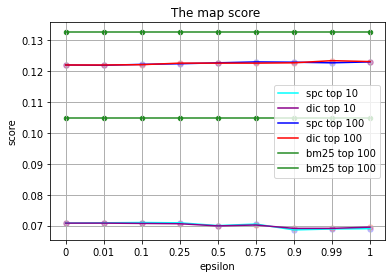

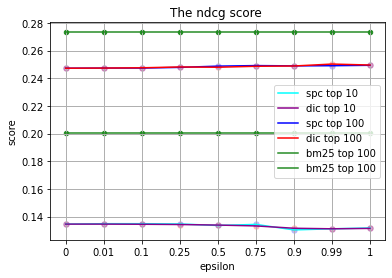

In [366]:
for metric in eval_results:
    for rank_nmb in eval_results[metric]:
        for type_reranking in eval_results[metric][rank_nmb]:
            values = eval_results[metric][rank_nmb][type_reranking]
            plt.plot(values,'-', c=graph_colors[f'{type_reranking}{rank_nmb}'], label=f"{type_reranking} top {rank_nmb}", alpha=1)
            plt.scatter(y=values,c=graph_colors[f'1{type_reranking}{rank_nmb}'], x=range(len(epsilon))[:len(values)], alpha=0.2,
            s = 30,marker= "o")
    
    #bm25 baseline
    if metric is 'map':
        plt.plot([top_100_bm25_map]*len(epsilon),'-', c='forestgreen', label=f"bm25 top 100")
        plt.scatter(y=[top_100_bm25_map]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
                   s = 20,marker= "o")
        plt.plot([top_10_bm25_map]*len(epsilon),'-', c='forestgreen', label=f"bm25 top 100")
        plt.scatter(y=[top_10_bm25_map]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
                   s = 20,marker= "o")
    elif metric is 'ndcg':
        plt.plot([top_100_bm25_ndcg]*len(epsilon),'-', c='forestgreen', label=f"bm25 top 100")
        plt.scatter(y=[top_100_bm25_ndcg]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
                   s = 20,marker= "o")
        plt.plot([top_10_bm25_ndcg]*len(epsilon),'-', c='forestgreen', label=f"bm25 top 100")
        plt.scatter(y=[top_10_bm25_ndcg]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
                   s = 20,marker= "o")

    plt.grid(linestyle='-', linewidth=1)
    plt.title(f'The {metric} score ')
    plt.xticks(range(len(epsilon)),labels=epsilon)
    plt.yscale("linear")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

### 

### Splitten top 10 of top 100

In [389]:
graph_colors = {
    'spc100': 'blue',
    'spc10':'blue',
    'dic100':'red',
    'dic10':'red',
    '1spc100': 'blue',
    '1spc10':'blue',
    '1dic100':'red',
    '1dic10':'red',

}

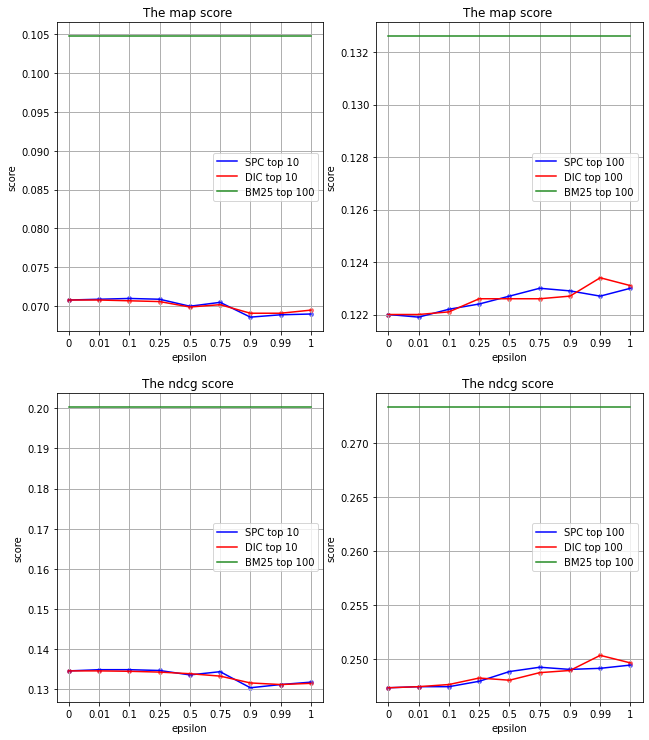

In [398]:
fig, axs = plt.subplots(2, 2)

fig.set_size_inches(10.5, 12.5)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0,0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')

for row, metric in enumerate(eval_results):
    for col, rank_nmb in enumerate(eval_results[metric]):
        for type_reranking in eval_results[metric][rank_nmb]:
            values = eval_results[metric][rank_nmb][type_reranking]
            axs[row, col].plot(values,'-', c=graph_colors[f'{type_reranking}{rank_nmb}'], label=f"{type_reranking.upper()} top {rank_nmb}", alpha=1)
            axs[row, col].scatter(y=values,c=graph_colors[f'1{type_reranking}{rank_nmb}'], x=range(len(epsilon))[:len(values)], alpha=0.5,
            s = 15,marker= "o")
    
        #bm25 baseline
        if metric is 'map':
            if rank_nmb is 100:
                axs[row, col].plot([top_100_bm25_map]*len(epsilon),'-', c='forestgreen', label=f"BM25 top 100")
#                 axs[row, col].scatter(y=[top_100_bm25_map]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
#                        s = 20,marker= "o")
            else:
                axs[row, col].plot([top_10_bm25_map]*len(epsilon),'-', c='forestgreen', label=f"BM25 top 100")
#                 axs[row, col].scatter(y=[top_10_bm25_map]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
#                        s = 20,marker= "o")
        elif metric is 'ndcg':
            if rank_nmb is 100:
                axs[row, col].plot([top_100_bm25_ndcg]*len(epsilon),'-', c='forestgreen', label=f"BM25 top 100")
#                 axs[row, col].scatter(y=[top_100_bm25_ndcg]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
#                            s = 20,marker= "o")
            else:
                axs[row, col].plot([top_10_bm25_ndcg]*len(epsilon),'-', c='forestgreen', label=f"BM25 top 100")
#                 axs[row, col].scatter(y=[top_10_bm25_ndcg]*len(epsilon),c='forestgreen', x=range(len(epsilon))[:len(epsilon)],
#                        s = 20,marker= "o")

        axs[row, col].grid(linestyle='-', linewidth=1)
        axs[row, col].set_title(f'The {metric.up} score ')
        axs[row, col].set_xticks(range(len(epsilon)))
        axs[row, col].set_xticklabels(epsilon)
        axs[row, col].set_xlabel('epsilon')
        axs[row, col].set_ylabel('score')
        axs[row, col].legend()
plt.show()

In [365]:
eval_results

{'map': {10: {'spc': [0.0708,
    0.0709,
    0.071,
    0.0709,
    0.07,
    0.0705,
    0.0686,
    0.0689,
    0.069],
   'dic': [0.0708,
    0.0708,
    0.0707,
    0.0706,
    0.0699,
    0.0702,
    0.0691,
    0.0691,
    0.0695]},
  100: {'spc': [0.122,
    0.1219,
    0.1222,
    0.1224,
    0.1227,
    0.123,
    0.1229,
    0.1227,
    0.123],
   'dic': [0.122,
    0.122,
    0.1221,
    0.1226,
    0.1226,
    0.1226,
    0.1227,
    0.1234,
    0.1231]}},
 'ndcg': {10: {'spc': [0.1346,
    0.1349,
    0.1349,
    0.1347,
    0.1336,
    0.1344,
    0.1304,
    0.1312,
    0.1318],
   'dic': [0.1346,
    0.1346,
    0.1345,
    0.1343,
    0.1339,
    0.1333,
    0.1316,
    0.1312,
    0.1315]},
  100: {'spc': [0.2473,
    0.2474,
    0.2474,
    0.2479,
    0.2488,
    0.2492,
    0.249,
    0.2491,
    0.2494],
   'dic': [0.2473,
    0.2474,
    0.2476,
    0.2482,
    0.248,
    0.2487,
    0.2489,
    0.2503,
    0.2496]}}}